In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import numpy as np
from typing import Any
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_folder = '../../data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, train=True, download=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y) -> None:
        x = x.float()
        x = x.view(-1, 28*28)       # the size -1 is inferred from other dimensions
        self.x, self.y = x,y
    def __getitem__(self, ix) -> Any:
        x,y =self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [4]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_func, optimizer

In [5]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()   # need to understand
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

In [6]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()    # need to understand
    prediction = model(x)
    # shape : 32x10, 
    # one prediction for each element (32 elements) in the batch
    # each prediction is having possibilities for 10 classes
    max_values, argmaxes = prediction.max(-1)
    # argmaxes are the indeces of the max values in prediction which represent the class itself
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [7]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

In [8]:
losses, accuracies = [], []
for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


C:\Users\yashl\AppData\Local\Temp\ipykernel_9264\2879513180.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


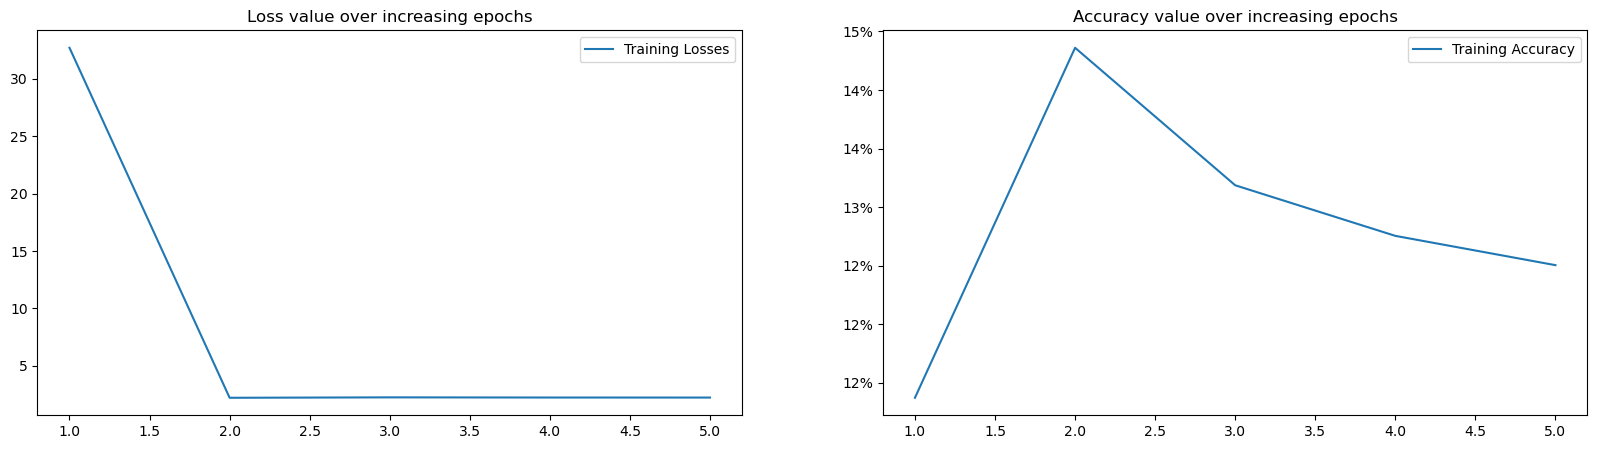

In [9]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Losses')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.show()

##### Testing

In [20]:
len(epoch_losses)

1875

In [13]:
for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    break

In [30]:
print(x.shape)
print(max_values.shape)
print(max_values)
print(prediction.max(-1))
print(prediction.shape)
print(prediction)

torch.Size([32, 784])
torch.Size([32])
tensor([35.5973, 78.8932, 18.8232, 58.2315, 23.2089, 31.8590, 57.8704, 34.3674,
        64.3446, 26.4350, 35.7693, 36.0462, 61.0439, 61.2812, 14.0207, 55.3967,
        26.7053, 77.5270, 62.6646, 31.7973, 23.3610, 21.9288, 33.7683, 67.7172,
        51.0625, 19.8575, 38.4997, 44.8531, 67.6914, 18.4063, 19.2855, 14.8099],
       device='cuda:0', grad_fn=<MaxBackward0>)
torch.return_types.max(
values=tensor([35.5973, 78.8932, 18.8232, 58.2315, 23.2089, 31.8590, 57.8704, 34.3674,
        64.3446, 26.4350, 35.7693, 36.0462, 61.0439, 61.2812, 14.0207, 55.3967,
        26.7053, 77.5270, 62.6646, 31.7973, 23.3610, 21.9288, 33.7683, 67.7172,
        51.0625, 19.8575, 38.4997, 44.8531, 67.6914, 18.4063, 19.2855, 14.8099],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([9, 5, 2, 9, 0, 9, 9, 9, 9, 5, 7, 1, 9, 9, 9, 9, 9, 5, 9, 9, 9, 4, 9, 9,
        9, 5, 9, 7, 9, 4, 9, 6], device='cuda:0'))
torch.Size([32, 10])
tensor([[-2.8559e-01,  1.6698e+

In [33]:
y == argmaxes

tensor([False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False], device='cuda:0')

In [38]:
for _, i in enumerate(iter(trn_dl)):
    print(i)
    print(len(i))
    print(i[0].shape)
    print(i[1].shape)
    x,y = i
    print(x, y)
    break

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'), tensor([8, 6, 8, 6, 1, 2, 5, 6, 5, 4, 0, 2, 1, 9, 3, 9, 3, 1, 6, 8, 4, 8, 0, 3,
        4, 4, 8, 8, 8, 6, 5, 7], device='cuda:0')]
2
torch.Size([32, 784])
torch.Size([32])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0') tensor([8, 6, 8, 6, 1, 2, 5, 6, 5, 4, 0, 2, 1, 9, 3, 9, 3, 1, 6, 8, 4, 8, 0, 3,
        4, 4, 8, 8, 8, 6, 5, 7], device='cuda:0')


In [30]:
train = FMNISTDataset(tr_images, tr_targets)
len(train)

60000

In [32]:
tr_images.view(-1, 28*28).shape

torch.Size([60000, 784])

In [41]:
print(type(trn_dl))
print(type(iter(trn_dl)))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
